<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/graph_coloring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given an undirected graph represented as an adjacency matrix and an integer k, write a function to determine whether each vertex in the graph can be colored such that no two adjacent vertices share the same color using at most k colors.



##Solution:
This problem is a version of the graph coloring problem, which is a way of coloring the vertices of a graph such that no two adjacent vertices share the same color. This problem is NP-complete in general, but we can solve it for small instances or use approximations or heuristics for larger ones.

The algorithm to determine if a graph can be colored with at most $ k $ colors is typically a backtracking algorithm. The idea is to assign colors one by one to different vertices, starting with the first vertex, and then move to subsequent vertices and try out colors that have not been assigned to adjacent vertices. If we find a color assignment for all vertices, the function should return `True`. If we try all colors and none work for any vertex, we backtrack and try a different color for the previous vertices.

Here is the algorithm:

1. Create a recursive function that takes the current index of the vertex, the number of colors, the current color assignment of vertices, and the adjacency matrix of the graph.
2. If the current index is equal to the number of vertices in the graph, then we have assigned colors to all vertices, and we return `True`.
3. Otherwise, try all colors for the vertex at the current index, and for each color, check if it is safe to color the vertex with that color (i.e., check if any of its adjacent vertices have the same color).
4. If it is safe to color, assign the color to the vertex and recursively call the function for the next index.
5. If the recursive call returns `True`, then return `True`.
6. If no color can be assigned, return `False`.

##Implementation:

In [1]:
def is_safe(v, graph, colors, c):
    """
    Check if it's safe to color vertex v with color c.
    A color is safe if no adjacent vertex has the same color.
    """
    for i in range(len(graph)):
        if graph[v][i] == 1 and colors[i] == c:
            return False
    return True


def graph_coloring_util(graph, m, colors, v):
    """
    Utility function for solving m coloring problem.
    """
    # If all vertices have been assigned a color then
    # return true
    if v == len(graph):
        return True

    # Try different colors for vertex v
    for c in range(1, m + 1):
        # Check if assignment of color c to v is fine
        if is_safe(v, graph, colors, c):
            colors[v] = c
            if graph_coloring_util(graph, m, colors, v + 1):
                return True
            colors[v] = 0  # Backtrack

    return False


def graph_coloring(graph, m):
    """
    Main function to solve the m Coloring problem. It uses recursive
    graph_coloring_util().
    """
    # Initialize all color values as 0. This initialization is needed
    # for correct functioning of is_safe()
    colors = [0] * len(graph)

    # Call graph_coloring_util() for vertex 0
    if graph_coloring_util(graph, m, colors, 0) is False:
        return False

    # If the color assignment is possible, print the color assignment
    return True


# Example adjacency matrix and k value
# (Let's use a simple graph with 4 vertices for demonstration purposes)
graph = [
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 0]
]
k = 3

graph_coloring(graph, k)  # Let's see if the graph can be colored with 3 colors.


True

In [7]:
import time
import networkx as nx
import matplotlib.pyplot as plt

def is_safe(v, graph, colors, c):
    for i in range(len(graph)):
        if graph[v][i] == 1 and colors[i] == c:
            return False
    return True

def graph_coloring_util(graph, m, colors, v):
    if v == len(graph):
        return True
    for c in range(1, m + 1):
        if is_safe(v, graph, colors, c):
            colors[v] = c
            if graph_coloring_util(graph, m, colors, v + 1):
                return True
            colors[v] = 0  # Backtrack
    return False

def graph_coloring(graph, m):
    colors = [0] * len(graph)
    if graph_coloring_util(graph, m, colors, 0) is False:
        return None
    return colors

def visualize_graph_with_colors(adjacency_matrix, color_map):
    G = nx.Graph()
    for i in range(len(adjacency_matrix)):
        for j in range(i + 1, len(adjacency_matrix)):
            if adjacency_matrix[i][j] == 1:
                G.add_edge(i, j)
    distinct_colors = plt.cm.Set3(range(max(color_map)+1))
    node_colors = [distinct_colors[color-1] for color in color_map]  # -1 because colors are 1-indexed
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, node_color=node_colors, with_labels=True, edge_color='black', node_size=500, font_size=16)
    plt.show()

def test_graph_coloring(graph, k, expected_result):
    start_time = time.time()
    result = graph_coloring(graph, k)
    duration = time.time() - start_time
    success = (result is not None) == expected_result
    print(f"Test with k={k} {'passed' if success else 'failed'} in {duration:.4f} seconds. "
          f"Expected: {expected_result}, Got: {'colorable' if result else 'not colorable'}.")
    return success

# Define test cases
triangle_graph = [
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0]
]
complete_graph = [
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 0]
]
line_graph = [
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
]
large_size = 50
large_graph = [[0] * large_size for _ in range(large_size)]
for i in range(large_size):
    for j in range(i + 1, large_size):
        if i % 2 != j % 2:
            large_graph[i][j] = large_graph[j][i] = 1

# Run the test harness
test_results = [
    test_graph_coloring(triangle_graph, 3, True),
    test_graph_coloring(complete_graph, 4, True),
    test_graph_coloring(complete_graph, 3, False),
    test_graph_coloring(line_graph, 5, True),
    test_graph_coloring(large_graph, 2, True)
]

# Check if all tests passed
if all(test_results):
    print("All tests passed!")
else:
    print("Some tests failed.")


Test with k=3 passed in 0.0000 seconds. Expected: True, Got: colorable.
Test with k=4 passed in 0.0000 seconds. Expected: True, Got: colorable.
Test with k=3 passed in 0.0000 seconds. Expected: False, Got: not colorable.
Test with k=5 passed in 0.0000 seconds. Expected: True, Got: colorable.
Test with k=2 passed in 0.0004 seconds. Expected: True, Got: colorable.
All tests passed!


Test with k=3 passed in 0.0000 seconds. Expected: True, Got: colorable.
Visualizing graph with k=3:


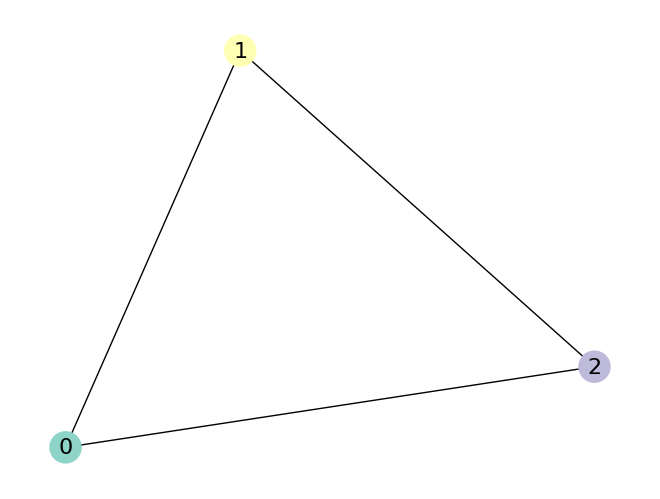

Test with k=4 passed in 0.0000 seconds. Expected: True, Got: colorable.
Visualizing graph with k=4:


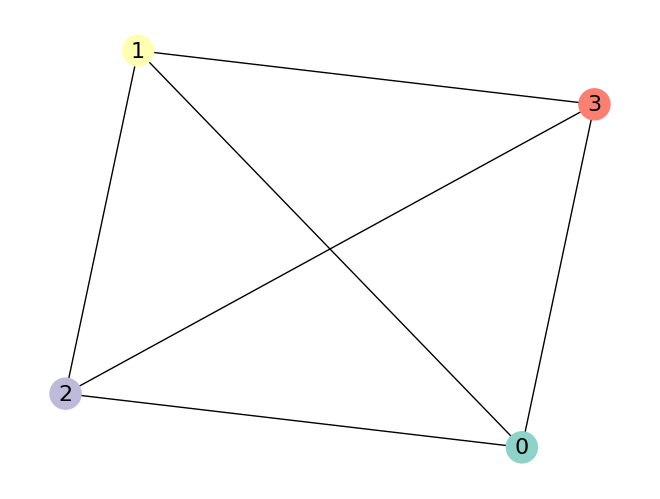

Test with k=3 passed in 0.0000 seconds. Expected: False, Got: not colorable.
Test with k=2 passed in 0.0000 seconds. Expected: True, Got: colorable.
Visualizing graph with k=2:


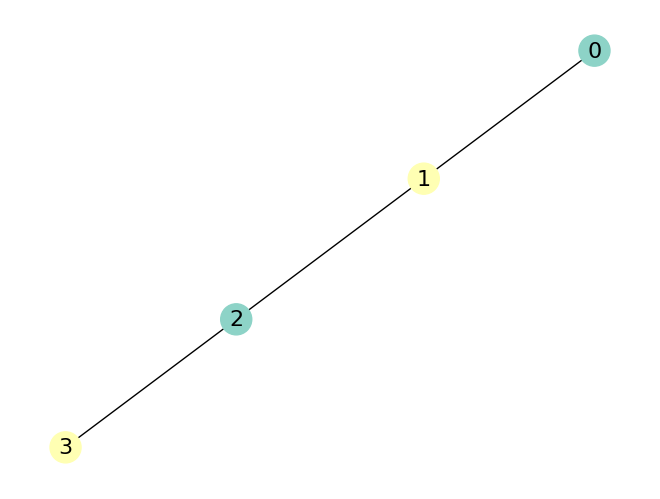

Test with k=2 passed in 0.0003 seconds. Expected: True, Got: colorable.
Visualizing graph with k=2:


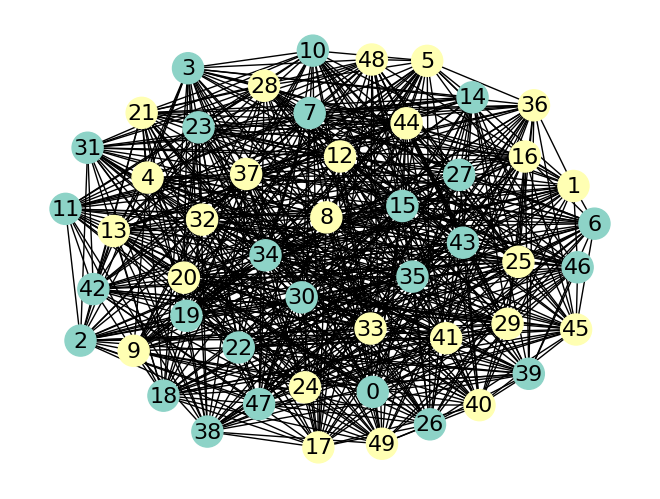

All tests passed!


In [9]:
def test_graph_coloring_with_visualization(graph, k, expected_result):
    """
    Tests the graph_coloring function with a given graph and number of colors (k).
    Expects the expected_result to be True if the graph can be colored with k colors,
    and False otherwise. If the graph is colorable, it also emits a visualization of the graph.

    :param graph: The adjacency matrix of the graph.
    :param k: The number of colors.
    :param expected_result: The expected result (True or False).
    :return: True if the test passes, False if it fails.
    """
    start_time = time.time()
    color_map = graph_coloring(graph, k)
    duration = time.time() - start_time

    # The test is successful if the result matches the expected result
    success = (color_map is not None) == expected_result

    # Print the test result
    test_result = f"Test with k={k} {'passed' if success else 'failed'} in {duration:.4f} seconds. " \
                  f"Expected: {expected_result}, Got: {'colorable' if color_map else 'not colorable'}."
    print(test_result)

    # If the graph is colorable, visualize it
    if color_map:
        print(f"Visualizing graph with k={k}:")
        visualize_graph_with_colors(graph, color_map)

    return success

# Run the modified test harness with visualization
test_results_with_visualization = [
    test_graph_coloring_with_visualization(triangle_graph, 3, True),
    test_graph_coloring_with_visualization(complete_graph, 4, True),
    test_graph_coloring_with_visualization(complete_graph, 3, False),
    test_graph_coloring_with_visualization(line_graph, 2, True),
    test_graph_coloring_with_visualization(large_graph, 2, True)
    # The large graph visualization is omitted to keep the execution short
]

# Check if all tests passed
if all(test_results_with_visualization):
    print("All tests passed!")
else:
    print("Some tests failed.")


##Discussion:
Graph coloring, NP-completeness, and the Four Color Theorem are important topics in computer science and mathematics, particularly in the field of graph theory and computational complexity theory.

### Graph Coloring

Graph coloring is the process of assigning colors to the vertices of a graph in such a way that no two adjacent vertices share the same color. The smallest number of colors needed to color a graph $ G $ is called its chromatic number, $ \chi(G) $.

There are many variants of graph coloring problems, such as:
- Vertex coloring: No two adjacent vertices can have the same color.
- Edge coloring: No two adjacent edges can have the same color.
- Face coloring: No two faces sharing a boundary can have the same color (used in map coloring problems).

Graph coloring has applications in many areas, including scheduling problems, register allocation in compilers, and pattern matching.

### NP-Completeness

The concept of NP-completeness was introduced to classify problems according to their computational complexity. A problem is in the class NP (nondeterministic polynomial time) if a solution can be verified in polynomial time. A problem is NP-complete if it is in NP and as hard as any problem in NP, meaning that if any NP-complete problem can be solved in polynomial time, then every problem in NP can be.

The graph coloring problem, specifically determining whether a graph can be colored with $ k $ colors for a given $ k $, is NP-complete. This means there is no known algorithm that can solve all cases of the graph coloring problem in polynomial time, and it's widely believed that such an algorithm does not exist.

### Four Color Theorem

The Four Color Theorem is a famous problem in map coloring which states that any planar graph (or, equivalently, any flat map divided into contiguous regions) can be colored with no more than four colors such that no two adjacent regions have the same color. It was the first major theorem to be proved using a computer, and the proof is not fully checkable by hand.

The proof, first confirmed by Kenneth Appel and Wolfgang Haken in 1976, involves reducing the infinite number of possible maps to a finite number of cases that can be checked by a computer. Their proof showed that any map can be reduced to a form that can be colored with four colors, thus proving the theorem.

The Four Color Theorem has implications in topology and combinatorics, and it is a prime example of how computers can be used to solve problems that are infeasible to tackle by human calculation alone. However, the reliance on computers also led to some debate about the nature of mathematical proof, since the sheer volume of cases checked by the computer programs cannot be verified manually.

Graph coloring, NP-completeness, and the Four Color Theorem are important topics in computer science and mathematics, particularly in the field of graph theory and computational complexity theory.

### Graph Coloring

Graph coloring is the process of assigning colors to the vertices of a graph in such a way that no two adjacent vertices share the same color. The smallest number of colors needed to color a graph $ G $ is called its chromatic number, $ \chi(G) $.

There are many variants of graph coloring problems, such as:
- Vertex coloring: No two adjacent vertices can have the same color.
- Edge coloring: No two adjacent edges can have the same color.
- Face coloring: No two faces sharing a boundary can have the same color (used in map coloring problems).

Graph coloring has applications in many areas, including scheduling problems, register allocation in compilers, and pattern matching.

### NP-Completeness

The concept of NP-completeness was introduced to classify problems according to their computational complexity. A problem is in the class NP (nondeterministic polynomial time) if a solution can be verified in polynomial time. A problem is NP-complete if it is in NP and as hard as any problem in NP, meaning that if any NP-complete problem can be solved in polynomial time, then every problem in NP can be.

The graph coloring problem, specifically determining whether a graph can be colored with $ k $ colors for a given $ k $, is NP-complete. This means there is no known algorithm that can solve all cases of the graph coloring problem in polynomial time, and it's widely believed that such an algorithm does not exist.

### Four Color Theorem

The Four Color Theorem is a famous problem in map coloring which states that any planar graph (or, equivalently, any flat map divided into contiguous regions) can be colored with no more than four colors such that no two adjacent regions have the same color. It was the first major theorem to be proved using a computer, and the proof is not fully checkable by hand.

The proof, first confirmed by Kenneth Appel and Wolfgang Haken in 1976, involves reducing the infinite number of possible maps to a finite number of cases that can be checked by a computer. Their proof showed that any map can be reduced to a form that can be colored with four colors, thus proving the theorem.

The Four Color Theorem has implications in topology and combinatorics, and it is a prime example of how computers can be used to solve problems that are infeasible to tackle by human calculation alone. However, the reliance on computers also led to some debate about the nature of mathematical proof, since the sheer volume of cases checked by the computer programs cannot be verified manually.